The first cell contain a simple test to compare ZipinBrdf vs BeckmanBrdf.

theta_o is set to 60 degrees, phi_o is 0, u is set at (.5, .5), so phi_i= u2 * 2PI = PI.

I created a ZipinBrdf and used its Sample(Wo) method to generate a tuple output:  (brdf_value, pdf, Wi).    Then I invoke ZipinBrdf.eval(Wo, wi).  I compare the return of ZipinBrdf.Eval(Wo, ZipinBrdf.Sample(Wo)) with the (value, pdf) output of Zipin.Sample(Wo).  For the Brdf to be correct, I expect the ZipinBrdf.Eval(Wo, Wi returned by ZipinBrdf.Sample(Wo)) == (value, pdf) returned by ZipinBrdf.Sample(Wo).

You can see from the test, the brdf values are matching but not the pdf values.  I need to check why.

You can see this test is confirmed by Beckman brdf.

Also the brdf value returned by ZipinBrdf is consistently lower than the brdf values computed by Beckman brdf, with values that seem to be within the range of  "zipin ratio" * the beckman brdf values.


In [6]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;
alpha = .3
zipinVersion = 'Feng'
zipin= brdf.ZipinBrdf(alpha, alpha, zipinVersion);
theta_o = math.pi /3;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
u = (.5, .5)
print(wo, u)

maxBounce = 1
zsample =zipin.Sample(wo, u);
if zsample[0]>0:
    zeval = zipin.Eval(wo, zsample[2], maxBounce);
    print(zsample[2])
    print(zeval, zsample);

beckman = brdf.Brdf(alpha, alpha);
bsample = beckman.Sample(wo, u);
if bsample[0]>0:
    beval = beckman.Eval(wo, bsample[2]);
    print(bsample[2]);
    print(beval, bsample);

zipinVersion:  Feng
Vec3(0, 0.8660254037844386, 0.5000000000000001) (0.5, 0.5)
Vec3(-0.5292191366892408, 6.481065217940044e-17, 0.8484851827591892)
(0.7148377010499289, 1.2470275826044765) (0.714837701049929, 0.714837701049929, <vec3.Vec3 object at 0x10ea56518>, <vec3.Vec3 object at 0x10ea564e0>)
Vec3(-0.23510007732975968, -0.8660254037844386, 0.4412799039606734)
(0.9979529196086191, 0.9979529196086191) (0.9979529196086167, 0.9979529196086167, <vec3.Vec3 object at 0x10eafb470>)


The cell below plots the beckman brdf and zipin brdf for:

Fixed alpha value:  .1 (you can play with different values to see the different shapes)
theta_o: 60 degrees
phi_o and phi_i fixed at  : PI and -PI

X axis:  cos(theta_I) in  (0, 1) with 1000 samples
Y axis: brdf evaluation using (Wo, Wi)


zipinVersion:  Feng


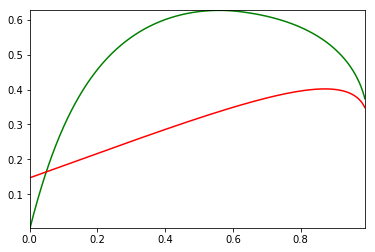

In [9]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

#pat, change this value to see the shape of the plots change
alpha = .5

#change this to 'Pat" to use Pat's zipin inplementation
zipinVersion = 'Feng'

beckman = brdf.Brdf(alpha, alpha);
zipin= brdf.ZipinBrdf(alpha, alpha,  zipinVersion);

theta_o = math.pi /3;
phi_o = 0
wo = vec3.Vec3(0, math.sin(theta_o) * math.cos(phi_o), math.cos(theta_o))
xdata= [];              
zdata=[]; 
bdata = [];
zsamples = []
bsamples = []
sampleCount = 1000

maxBounce = 1
phi_i = math.pi
for i in range(sampleCount):
   #thetaWi = minAngle + rangeAngle * float(i)/float(sampleCount) 
    mu = ((float)(1+i))/(sampleCount)
   
    fmu = math.fabs(mu)
    if fmu < .001 or fmu > .99:
        continue
    
    sinTheta = math.sqrt(1.0 - mu * mu) * math.cos(phi_i)
    wi = vec3.Vec3(0, sinTheta, mu)
    beval = beckman.Eval(wo, wi, False)
    wi = vec3.Vec3(0, sinTheta, mu)
    zeval = zipin.Eval(wo, wi, maxBounce)
    
    bsamples.append(beval) 
    zsamples.append(zeval)
    xdata.append(mu)
    bdata.append(beval[0])
    zdata.append(zeval[0])
  
    
plt.plot(xdata, bdata, color = 'green');
plt.plot(xdata, zdata, color = 'red');
plt.autoscale(True, 'both', True)
plt.show()  

